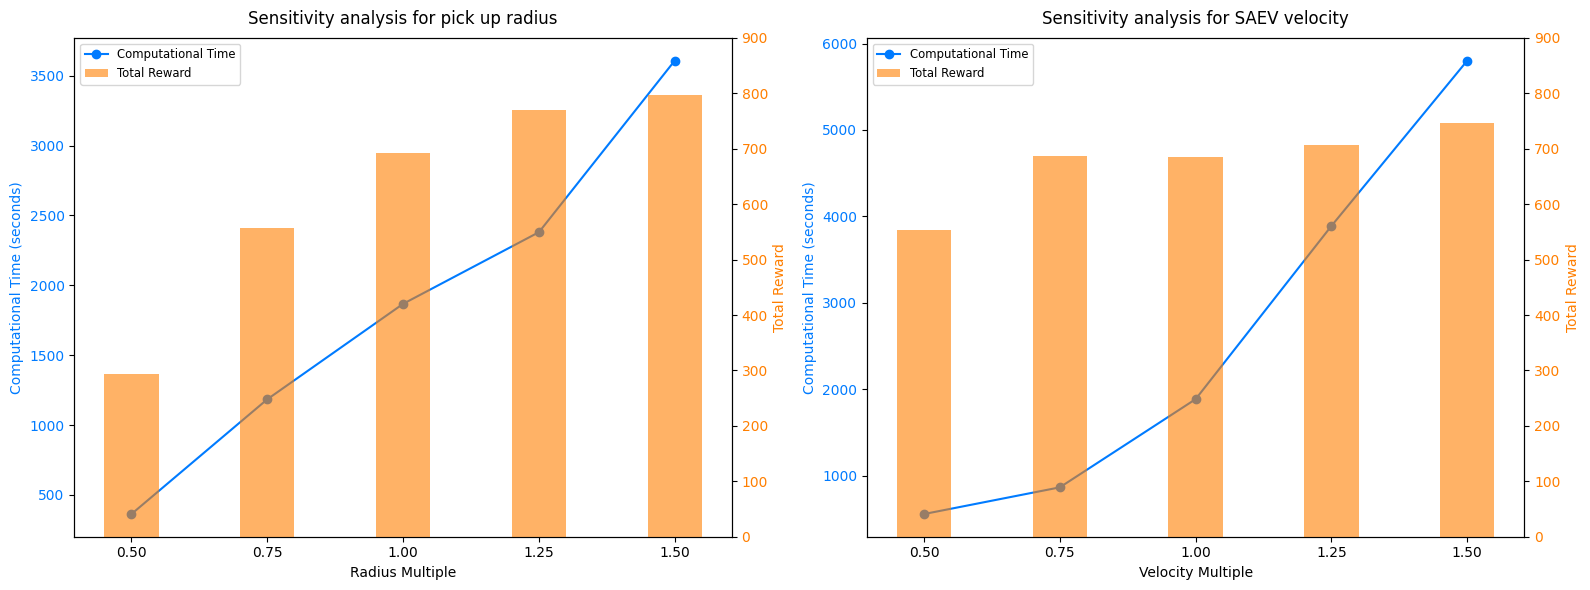

In [1]:
import matplotlib.pyplot as plt

# Data for radius sensitivity analysis
radius_multiples = [0.5, 0.75, 1.0, 1.25, 1.5]
radius_rewards = [
    294.27692458100086,
    557.1261320046688,
    691.6656691703131,
    770.3958460255657,
    796.0800135900015
]
radius_times = [
    363.17,
    1184.51,
    1867.61,
    2380.55,
    3608.63
]

# Data for velocity sensitivity analysis
velocity_multiples = [0.5, 0.75, 1.0, 1.25, 1.5]
velocity_rewards = [
    553.9569288060588,
    687.7118222833515,
    685.5629535512657,
    707.31429380448,
    745.8960031616888
]
velocity_times = [
    558.57,
    867.27,
    1887.28,
    3890.83,
    5802.72
]

# Function to create combined plots for radius and velocity
def create_combined_plots(radius_data, velocity_data, time_color='#007BFF', reward_color='#FF7F00'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Increase width for larger plot area

    # Plot for Radius
    ax1.set_xlabel('Radius Multiple')
    ax1.set_ylabel('Computational Time (seconds)', color=time_color)
    time_line, = ax1.plot(radius_data['multiples'], radius_data['times'], marker='o', color=time_color, label='Computational Time')
    ax1.tick_params(axis='y', labelcolor=time_color)
    ax1.set_xticks([0.5, 0.75, 1.0, 1.25, 1.5])  # Set specific x-axis ticks
    ax1.set_title('Sensitivity analysis for pick up radius', pad=10)  # Adjust title padding

    # Create a second y-axis for total reward and plot it as a slim bar
    ax2_r = ax1.twinx()
    bar_width = 0.1  # Set a slim bar width to avoid overlap
    reward_bar = ax2_r.bar([m for m in radius_data['multiples']], radius_data['rewards'], width=bar_width, color=reward_color, alpha=0.6, label='Total Reward')
    ax2_r.set_ylabel('Total Reward', color=reward_color)
    ax2_r.tick_params(axis='y', labelcolor=reward_color)
    ax2_r.set_ylim(0, 900)  # Set reward axis to 0-800

    # Combine both legends into one
    ax1.legend([time_line, reward_bar], ['Computational Time', 'Total Reward'], loc='upper left', fontsize='small')

    # Plot for Velocity
    ax2.set_xlabel('Velocity Multiple')
    ax2.set_ylabel('Computational Time (seconds)', color=time_color)
    time_line, = ax2.plot(velocity_data['multiples'], velocity_data['times'], marker='o', color=time_color, label='Computational Time')
    ax2.tick_params(axis='y', labelcolor=time_color)
    ax2.set_xticks([0.5, 0.75, 1.0, 1.25, 1.5])  # Set specific x-axis ticks
    ax2.set_title('Sensitivity analysis for SAEV velocity', pad=10)  # Adjust title padding

    # Create a second y-axis for total reward and plot it as a slim bar
    ax2_v = ax2.twinx()
    reward_bar = ax2_v.bar([m for m in velocity_data['multiples']], velocity_data['rewards'], width=bar_width, color=reward_color, alpha=0.6, label='Total Reward')
    ax2_v.set_ylabel('Total Reward', color=reward_color)
    ax2_v.tick_params(axis='y', labelcolor=reward_color)
    ax2_v.set_ylim(0, 900)  # Set reward axis to 0-800

    # Combine both legends into one
    ax2.legend([time_line, reward_bar], ['Computational Time', 'Total Reward'], loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig("sensitivity_analysis.svg", format="svg")
    plt.show()

# Combine data into dictionaries for easier passing
radius_data = {
    'multiples': radius_multiples,
    'rewards': radius_rewards,
    'times': radius_times
}

velocity_data = {
    'multiples': velocity_multiples,
    'rewards': velocity_rewards,
    'times': velocity_times
}

# Create combined plots for both radius and velocity
create_combined_plots(radius_data, velocity_data, time_color='#007BFF', reward_color='#FF7F00')


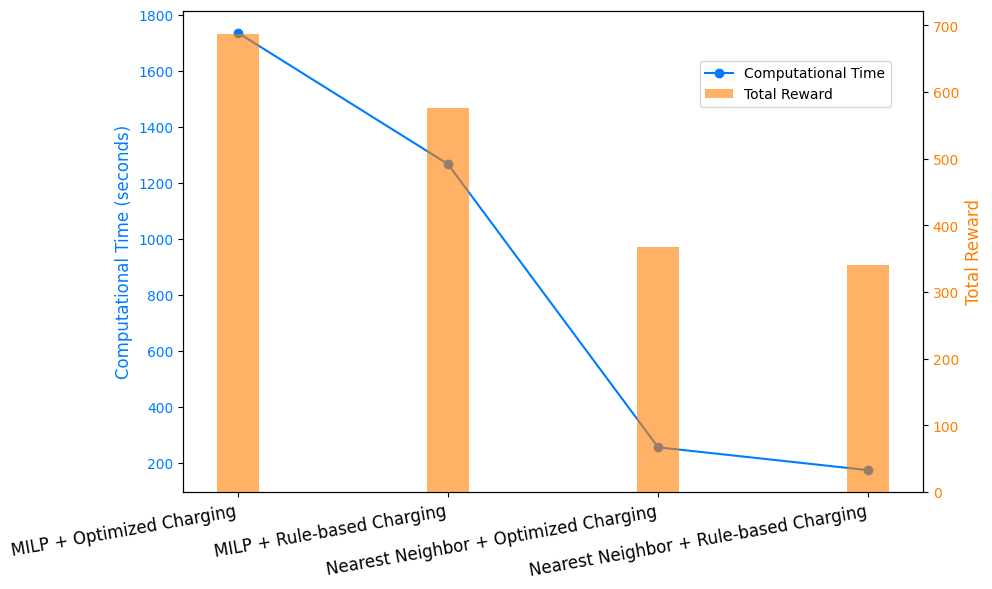

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each method
methods = [
    "MILP + Optimized Charging",
    "MILP + Rule-based Charging",
    "Nearest Neighbor + Optimized Charging",
    "Nearest Neighbor + Rule-based Charging"
]

rewards = [
    687.3551211597111,
    575.5314059656431,
    367.4216512785992,
    340.11843024860036
]

times = [
    1735.68,
    1266.26,
    255.08,
    173.48
]

x = np.arange(len(methods))  # X-axis positions

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Computational Time as a curve
# ax1.set_xlabel('Method', fontsize=12)
ax1.set_ylabel('Computational Time (seconds)', color='#007BFF', fontsize=12)
line1, = ax1.plot(x, times, marker='o', color='#007BFF', label='Computational Time')
ax1.tick_params(axis='y', labelcolor='#007BFF', labelsize=10)
ax1.set_xticks(x)
ax1.set_xticklabels(methods, rotation=10, ha="right", fontsize=12)

# Create a second y-axis for total reward and plot it as a slim bar
ax2 = ax1.twinx()
ax2.set_ylabel('Total Reward', color='#FF7F00', fontsize=12)
bar1 = ax2.bar(x, rewards, width=0.2, color='#FF7F00', alpha=0.6, label='Total Reward')
ax2.tick_params(axis='y', labelcolor='#FF7F00', labelsize=10)

# Add titles and combined legend inside the plot area
# ax1.set_title('Computational Time and Reward Comparison for Different Methods', fontsize=16)
fig.tight_layout()  # Adjust layout to prevent overlap
fig.legend([line1, bar1], ['Computational Time', 'Total Reward'], loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=10)
plt.savefig("baselines.svg", format="svg")
plt.show()
